# Visualizing Classifier

### Objective: To visualize the a classifier which identifies countries that will generate refugees

In [343]:
import pandas as pd
from math import log

dataset = pd.read_csv('/Users/joel/Documents/Brainstation/Tablaeu/CLEANDATA/clean_merged_all.csv').drop('Unnamed: 0', axis=1)
refugees = pd.read_csv('/Users/joel/Documents/Brainstation/Tablaeu/immigrantbyorigin.csv')



In [341]:
### Getting titles for each heading:

fields = []

for i,j in enumerate(dataset.columns):
    if i>=1 and i<=40:
        fields.append(j)
        
titles = {}

for field in fields:
            path = '/Users/joel/Documents/Brainstation/Tablaeu/UNINFO/'+field+'.csv'
            file = pd.read_csv(path, encoding='ISO-8859-1')
            
            heading = field
            title = file.columns[-1]

            titles[heading] = title

In [345]:
### Adding the sum of all arrivals to dataset

sums = []

for index in dataset.index:
    sums.append(dataset.loc[index,'Alabama':].sum(0))
    
dataset['sum_destination'] = sums

In [346]:
### Now let's create classes. If Sum_destination >0 then 1

classes = []
for index in dataset.index:
    if dataset.loc[index,'sum_destination'] > 0:
        classes.append(1)
    else:
        classes.append(0)

dataset['classes']=classes
counter = 0.0

for i in sums:
    counter+=i
    

In [348]:
import numpy as np
from sklearn.preprocessing import StandardScaler

### We'll be testing on 2015 data. So first split the set by year = 2015

df_fifteen = dataset.loc[dataset['year'] == 2015]
df_else = dataset.loc[dataset['year'] != 2015]

### Now split these sets into dependent and independent variables

X_test = df_fifteen.loc[:,'Demography4':'Work8']
X_train = df_else.loc[:,'Demography4':'Work8']

y_test = df_fifteen.loc[:,'classes']
y_train = df_else.loc[:,'classes']

# Let's first fit/tune a decision tree classifier

In [353]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth=5)
tree_classifier.fit(X_train, y_train)
tree_classifier.score(X_test,y_test)

0.8066298342541437

In [354]:
### Not bad. Now let's visualize it
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from matplotlib import pyplot as plt

# Create DOT data

dot_data = StringIO()
export_graphviz(tree_classifier, out_file = dot_data, feature_names = X_train.columns, filled=True, rounded = True, special_characters = True, class_names=['refugees','none'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

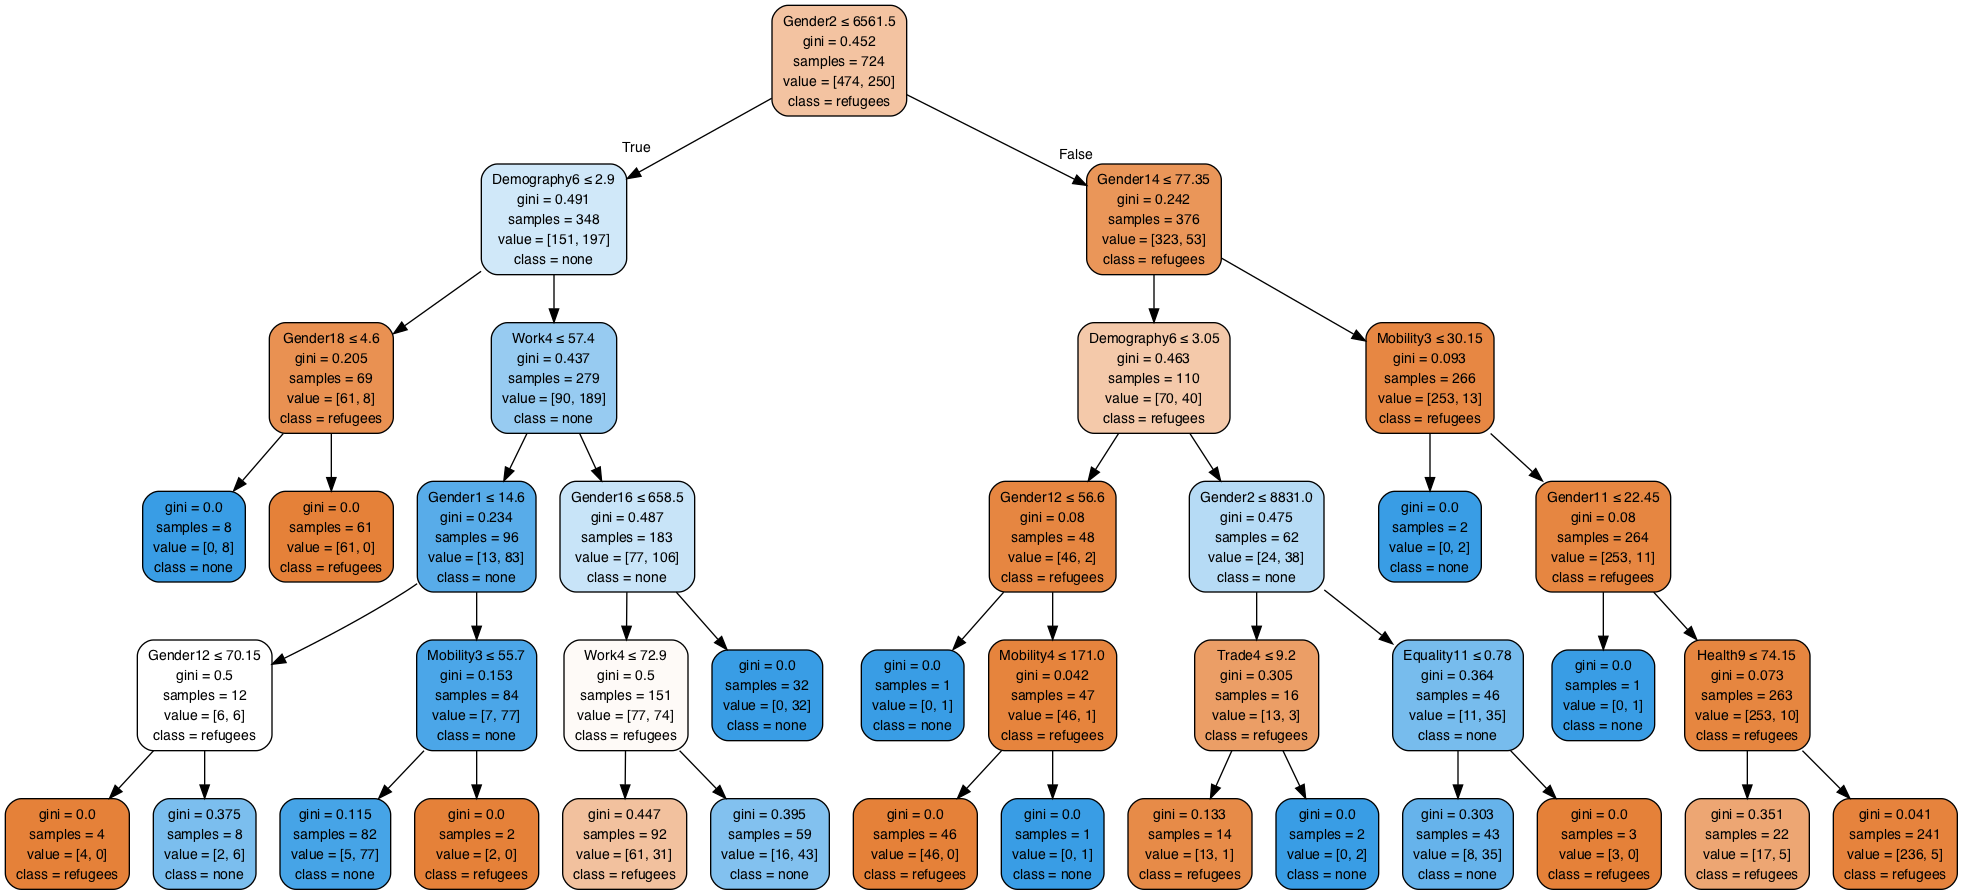

In [355]:
Image(graph.create_png())

# Here are the long form of each of the above dimensions:

In [356]:
titles

{'Demography4': 'Population, ages 15\x9664 (millions)',
 'Demography5': 'Population, ages 65 and older (millions)',
 'Demography6': 'Population, total (millions)',
 'Demography7': 'Population, under age 5 (millions)',
 'Demography8': 'Population, urban (%)',
 'Education2': 'Expected years of schooling (years)',
 'Education3': 'Education Index',
 'Education9': 'Mean years of schooling (years)',
 'Environment3': 'Forest area (% of total land area)',
 'Equality11': 'Inequality-adjusted life expectancy index',
 'Equality7': 'Inequality in life expectancy (%)',
 'Gender1': 'Adolescent birth rate (births per 1,000 women ages 15-19)',
 'Gender11': 'Labour force participation rate, female (% ages 15 and older)',
 'Gender12': 'Labour force participation rate, male (% ages 15 and older)',
 'Gender14': 'Life expectancy at birth, female (years)',
 'Gender15': 'Life expectancy at birth, male (years)',
 'Gender16': 'Maternal mortality ratio (deaths per 100,000 live births)',
 'Gender17': 'Mean years